<a href="https://colab.research.google.com/github/canneltigrou/canneltigrou.github.io/blob/master/JupyterNotebooks/BinaryClassificationOnImbalencedData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Challenge

## Subject
Welcome!  
  
Today you embark on one of perhaps the most daring adventures you will ever
experience. A challenge not even the greatest warriors of modern history could have
dreamed of accomplishing. And upon the completion of this challenge - if it does not
destroy you first - you will rise a champion, and will move to the subsequent
interview step for XXX. In this challenge, we will test every aspect of your data
science and programming skills, and in order to succeed you must prove your agility
and knowledge in a great number of varied fields.  

**Building a model**
Description: You are provided a CSV dataset file with multiple predictor variables
and a single target variable. Your goal is to build a model that takes as input
predictors and outputs a predicted Y-value.  
Dataset:  
https://drive.google.com/file/d/1H50WZNXcpN_Wy2e8uRxwfeSoEZJ2f5Th/view?usp=sharing 
  
*Important: Thoroughly comment your script or notebook : data exploration, feature
engineering, model selection, evaluation metrics... all your steps should be clearly
explained! In this quest, the quality of your code and thought process is more
important than the end results, i.e. the actual score of the model.
You can use any language, libraries and algorithms of your choice.*  
  
**Submission**
Upon receiving this assignment, you will have 3 hours to complete it. Please send
your script / notebook and any other relevant document via email once you’re done
with this exercise.  
And that is the challenge. With this I wish you the best of luck, and hope to see you 
soon once you have vanquished

## Include the libraries

In [ ]:
import os
import random
import pandas as pd     # to manipulate files and dataframes

# For the neural network:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils
from keras import backend as K

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from keras import __version__
print('Using Keras version:', __version__, 'backend:', K.backend())

Using TensorFlow backend.


Using Keras version: 2.3.1 backend: tensorflow


I set the seed to have always the same results

In [ ]:
from numpy.random import seed
seed(42) 

from tensorflow import random
random.set_seed(42)

In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Prepare the data

### download the data

In [ ]:
df = pd.read_csv('challenge_data_science.csv')


### let's explore a little the data

In [ ]:
df.head()

,Target variable Y,User id,Phone OS version,Phone device model,Countries,Gender,Year of birth,User source,User attribute 1,User attribute 2,User attribute 3,User attribute 4,User attribute 5,User attribute 6,User attribute 7,User attribute 8,User attribute 9,User attribute 10,User attribute 11,User attribute 12
0,0,id61539,7.1.1,asus_ASUS_X00HD,FR,0,1997,NaN,21,0,1,0,0.000000,0.036145,0.0,83,0,NaN,0,0
1,0,id131313,7,samsung_SM-A310F,DK,0,1999,NaN,19,0,2,0,0.000000,0.529412,0.0,102,0,NaN,0,0
2,0,id57636,8.0.0,samsung_SM-G935F,SE,2,1996,NaN,22,0,1,0,0.031915,0.063830,0.0,94,0,NaN,0,1
3,0,id138112,8.0.0,samsung_SM-A600T,US,0,1976,NaN,42,0,2,1,0.000000,0.200000,0.0,50,0,NaN,0,1
4,0,id140462,7,samsung_SM-N920P,US,0,1989,Bidalgo - Facebook,29,0,2,2,0.028571,0.071429,0.0,70,0,NaN,0,0


In [ ]:
df.describe()

,Target variable Y,Gender,Year of birth,User attribute 1,User attribute 2,User attribute 3,User attribute 4,User attribute 5,User attribute 6,User attribute 7,User attribute 8,User attribute 9,User attribute 11,User attribute 12
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,0.014901,0.392039,1989.784778,28.215222,0.021602,2.401140,0.721972,0.027241,0.165094,0.055006,74.493949,0.037804,0.350835,0.540254
std,0.121165,0.528750,11.395502,11.395502,0.158551,2.319327,0.844542,0.033359,0.111647,0.369055,49.215692,0.190731,0.477255,0.498402
min,0.000000,0.000000,1918.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1984.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.080745,0.000000,42.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1993.000000,25.000000,0.000000,2.000000,1.000000,0.018692,0.144578,0.000000,61.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1998.000000,34.000000,0.000000,3.000000,1.000000,0.041096,0.226467,0.000000,93.000000,0.000000,1.000000,1.000000
max,1.000000,2.000000,2006.000000,100.000000,3.000000,26.000000,4.000000,0.320513,1.000000,7.000000,976.000000,1.000000,1.000000,1.000000


In [ ]:
df.dtypes

Target variable Y       int64
User id                object
Phone OS version       object
Phone device model     object
Countries              object
Gender                  int64
Year of birth           int64
User source            object
User attribute 1        int64
User attribute 2        int64
User attribute 3        int64
User attribute 4        int64
User attribute 5      float64
User attribute 6      float64
User attribute 7      float64
User attribute 8        int64
User attribute 9        int64
User attribute 10      object
User attribute 11       int64
User attribute 12       int64
dtype: object

### Let's explore the data just a little bit more
We have the first column "Target variable Y" which is the output we want to predict (let's call it "Y").
It is an integer corresponding to a boolean value {0,1} with a huge majority of 0.  
  
We have 19 other columns (attributes) that can help us to predict the output Y.  
And we have 9999 samples.  
  
The 2nd column is the user_id. It is an unique number corresponding to a user but doesn't caracterise this one, so I won't use it to predict Y.  
  
I also notice that the 9th column, called "User attribute 1" corresponds to the age of the user in 2018. I think it is redoundant with the column "Year of birth". Personally I prefer remove one of this two column. Unfortunately I don't know what does Y mean, so I am not sure which one is more relevant to keep. I would think that the age is more relevant.
(So, for example if Y=1 means the person plays to a specific game, I think it is more likely because of his/her age. Maybe 10 years later, he/she will not play the game anymore but we can find new users playing this game that have the same age than he/she was)  
So I decide to not use "Year of birth" as attribute.  
  
We can use the 17 other attributes as inputs:  

* Phone OS version: categorical value
* Phone device model: categorical value
* Countries: categorical value
* Gender: integer {0,1,2}
* User source: categorical value
* User attribute 1: age of the user in 2018 (integer)
* User attribute 2: integer [0, 3]
* User attribute 3: integer [0, 26]
* User attribute 4: integer [0, 4]
* User attribute 5: float [0,1]
* User attribute 6: float [0, 1]
* User attribute 7: float (even if it seems there are only integer) [0,7]
* User attribute 8: integer
* User attribute 9: integer {0,1}
* User attribute 10: {"fluent", NaN} -> we could have recalled the column "is fluent" with the value {0,1}
* User attribute 11: {0,1}
* User attribute 12: {0,1}

### Preprocess the data

#### creation of y_data and X_data
Let's create y_data and X_data. 
* y_data is the first column 'Target variable Y'. shape =(9999,1)
* X_data is the 17 features we have chosen, but we will transform the categorical features into numerical ones, and stadardize all the data.  
shape=(9999,17)

In [ ]:
# return y_data (np_array), x_data(np_array) with only float and standardized features, 
# labels corresponding to the column names corresponding to x_data
def preprocess_data(dataframe):
    
    # 1. first let's create the y_data: composed of the first column. (9999,1)
    y_data = df['Target variable Y']
    
    
    # 2. let's create the numpy array corresponding to the input X_data (9999,17)
    # a) we will transform the categorical attributes into numbers.
    # make a dataframe of all the categorical attributes
    categorical_df = dataframe.select_dtypes(include=['object']).copy()
    
    # create maps for each categorigal attribute, with a number corresponding to each value. (I will not use "User id")
    labels_Phone_OS_version = categorical_df['Phone OS version'].astype('category').cat.categories.tolist()
    replace_map_Phone_OS_version = {'Phone OS version' : 
                                    {k: v for k,v in zip(labels_Phone_OS_version,list(range(1,len(labels_Phone_OS_version)+1)))}}
    
    labels_Phone_device_model = categorical_df['Phone device model'].astype('category').cat.categories.tolist()
    replace_map_device_model = {'Phone device model' : 
                                {k: v for k,v in zip(labels_Phone_device_model,list(range(1,len(labels_Phone_device_model)+1)))}}

    labels_Countries = categorical_df['Countries'].astype('category').cat.categories.tolist()
    replace_map_Countries = {'Countries' : 
                             {k: v for k,v in zip(labels_Countries,list(range(1,len(labels_Countries)+1)))}}

    categorical_df['User source'] = categorical_df['User source'].replace(np.nan, "")
    labels_User_source = categorical_df['User source'].astype('category').cat.categories.tolist()
    replace_map_User_source = {'User source' : 
                               {k: v for k,v in zip(labels_User_source,list(range(1,len(labels_User_source)+1)))}}

    categorical_df['User attribute 10'] = categorical_df['User attribute 10'].replace(np.nan, " ")
    labels_User_attribute_10 = categorical_df['User attribute 10'].astype('category').cat.categories.tolist()
    replace_map_User_attribute_10 = {'User attribute 10' : 
                                     {k: v for k,v in zip(labels_User_attribute_10,list(range(1,len(labels_User_attribute_10)+1)))}}
    
    # replace the categorical value by their corresponding number
    categorical_df.replace(replace_map_Phone_OS_version, inplace=True)
    categorical_df.replace(replace_map_device_model, inplace=True)
    categorical_df.replace(replace_map_Countries, inplace=True)
    categorical_df.replace(replace_map_User_source, inplace=True)
    categorical_df.replace(replace_map_User_attribute_10, inplace=True)
    
    # create the dataframe with all the numerical attributes
    numerical_df = pd.concat([categorical_df[['Phone OS version', 'Phone device model', 
                                              'Countries', 'User source', 'User attribute 10']], 
                              dataframe[['Gender','User attribute 1', 'User attribute 2', 'User attribute 3', 
                                         'User attribute 4', 'User attribute 5', 'User attribute 6', 
                                         'User attribute 7', 'User attribute 8', 'User attribute 9', 
                                         'User attribute 11', 'User attribute 12']]], axis = 1)
    labels = numerical_df.columns
    x_data = numerical_df.to_numpy()
    
    # b) Now we have the 17 attributes with only numerical values. 
    #    Let's normalized and standardize them to simplify the learning.
    
    # data normalisation
    scaler1 = MinMaxScaler()
    normalized_data = scaler1.fit_transform(numerical_df)
    
    # data standardization with sklearn
    scaler2 = StandardScaler()
    scaler2.fit(normalized_data)
    x_data = scaler2.transform(normalized_data)
    
    return y_data, x_data, labels
    
    

In [ ]:
y_data, x_data, labels = preprocess_data(df)

In [ ]:
# let's print the 4 firsts samples of x_data and y_data
print('x_data= \n', x_data[0:4, :])
print('y_data= \n', y_data[0:4])

x_data= 
 [[-0.11149289  0.07864255 -1.0953365  -1.49946319 -0.18840161 -0.7414824
  -0.63319568 -0.1362542  -0.60414511 -0.85491123 -0.81665604 -1.15502955
  -0.14905145  0.17284073 -0.19821467 -0.73514666 -1.08402685]
 [-0.82726654  0.5009898  -1.54647187 -1.49946319 -0.18840161 -0.7414824
  -0.80871231 -0.1362542  -0.17296403 -0.85491123 -0.81665604  3.26328561
  -0.14905145  0.55891576 -0.19821467 -0.73514666 -1.08402685]
 [ 0.60428075  0.78786718  0.37085344 -1.49946319 -0.18840161  3.04121277
  -0.54543736 -0.1362542  -0.60414511 -0.85491123  0.14010624 -0.90704634
  -0.14905145  0.39635785 -0.19821467 -0.73514666  0.92248638]
 [ 0.60428075  0.54614643  0.70920496 -1.49946319 -0.18840161 -0.7414824
   1.20972892 -0.1362542  -0.17296403  0.32922194 -0.81665604  0.31266365
  -0.14905145 -0.49771065 -0.19821467 -0.73514666  0.92248638]]
y_data= 
 0    0
1    0
2    0
3    0
Name: Target variable Y, dtype: int64


Let's see how much the data is imbalanced

In [ ]:
neg, pos = np.bincount(y_data)
total = neg + pos
print(' Total of samples: {}\n Number of Positive Y: {} ({:.2f}% of total)\n'.format
      (total, pos, 100 * pos / total))

 Total of samples: 9999
 Number of Positive Y: 149 (1.49% of total)



#### split the data into train / test dataset
  
We can split with 80% for training, and 20% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, train_size = 0.8) 

In [ ]:
print('percentage of Positive Y into the training set: ', sum(y_train)/len(y_train)*100)
print('percentage of Positive Y into the testing set: ', sum(y_test)/len(y_test)*100)
print('percentage of Positive Y in total set: ',100 * pos/9999)

percentage of Positive Y into the training set:  1.5626953369171148
percentage of Positive Y into the testing set:  1.2
percentage of Positive Y in total set:  1.4901490149014902


the train_test_split function shuffles the data. We can check than we have almost the same proportion of Positive Y into the training set and testing set. But it will change if we run the train_test_split function again. It will also change the following results

**Important:** There are ~1,5% of y=1.
If I predict always y=0 I would have 98% of accuracy!
So if we have a good neural network, **we MUST have a better accuracy than 98% !!!**


## train a neural network

#### build a model
We have to predict Y as 0 or 1 so I will use 1 output neuron with a sigmoid, Losses: Binary-crossentropy and Adam Optimizer.

As we have a lot of value Y = 0, I will prefere the metric recall (percentage of positif cases that the model predicts correctly) rather than the accuracy.

For the other layers, I use ReLU activation.

In [ ]:
model = Sequential()

img_shape = X_test[0].shape
print(img_shape)

model.add(Dense(20, input_dim=17))
model.add(Activation('relu'))
model.add(Dense(20))
model.add(Activation('relu'))
model.add(Dense(20))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))

# classification
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.adam(), 
              metrics=[keras.metrics.Recall(), 'accuracy'])

# Print the model
model.summary()

(17,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                360       
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
activation_2 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
activation_3 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)         

#### train the model on the training set


In [ ]:
history = model.fit(X_train, y_train, batch_size=320, epochs = 25, verbose = 1)

Epoch 1/25
7999/7999 [==============================] - 1s 69us/step - loss: 0.6193 - recall_1: 0.3120 - accuracy: 0.7123
Epoch 2/25
7999/7999 [==============================] - 0s 7us/step - loss: 0.2987 - recall_1: 0.0000e+00 - accuracy: 0.9837
Epoch 3/25
7999/7999 [==============================] - 0s 7us/step - loss: 0.1141 - recall_1: 0.0000e+00 - accuracy: 0.9844
Epoch 4/25
7999/7999 [==============================] - 0s 8us/step - loss: 0.0861 - recall_1: 0.0000e+00 - accuracy: 0.9844
Epoch 5/25
7999/7999 [==============================] - 0s 8us/step - loss: 0.0835 - recall_1: 0.0000e+00 - accuracy: 0.9844
Epoch 6/25
7999/7999 [==============================] - 0s 8us/step - loss: 0.0820 - recall_1: 0.0000e+00 - accuracy: 0.9844
Epoch 7/25
7999/7999 [==============================] - 0s 8us/step - loss: 0.0809 - recall_1: 0.0000e+00 - accuracy: 0.9844
Epoch 8/25
7999/7999 [==============================] - 0s 8us/step - loss: 0.0800 - recall_1: 0.0000e+00 - accuracy: 0.9844
Epo

Let's study the accuracy during the training


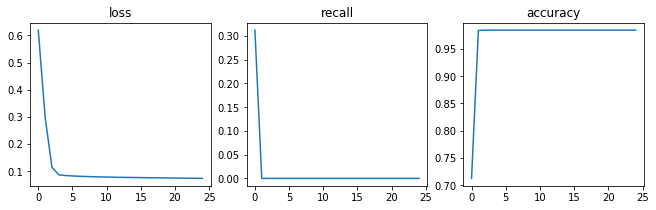

In [ ]:
plt.figure(figsize=(11,3))

# loss plot on the training set
plt.subplot(1,3,1)
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

# accuracy plot on the training set
plt.subplot(1,3,2)
plt.plot(history.epoch,history.history['recall_1'])
plt.title('recall');

# accuracy plot on the training set
plt.subplot(1,3,3)
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

Let's see on the training set first

In [ ]:
predictions = model.predict(X_train)
y_pred = predictions > 0.5
print(' [[TN, FP]\n [ FN, TP]]\n  =  \n', confusion_matrix(y_train, y_pred))



 [[TN, FP]
 [ FN, TP]]
  =  
 [[7874    0]
 [ 125    0]]


In [ ]:
predictions = model.predict(X_test)
y_pred = predictions > 0.5
print(' [[TN, FP]\n [ FN, TP]]\n  =  \n', confusion_matrix(y_test, y_pred))


 [[TN, FP]
 [ FN, TP]]
  =  
 [[1976    0]
 [  24    0]]


### Conclusion
I don't like the result, since even with the training set, the model always predict 0. It has a good accuracy only because there is not enough positive Y.

I would like to train again with more data that contain y = 1.
To do so, I will replicate several times some data from the training set where y=1.
It can provoke overfitting, but we will verify it with the testing set

## 2nd try, neural network with "data augmentation"

### Augment the training set with more y=1
let's duplicate several times the data in X_train where y=1   
1. let's find the data where y=1 in the training set

In [ ]:
mask = y_train == 1 # array of true and false values corresponding to Y==1
X_y1 = X_train[mask]  # we make an array of the X_train lines corresponding to Y=1

2. let's duplicate this data and put them into X_train  
I would like a better balance between y=1 and y = 0.  
I would like to find the number of times (x) that I have to add a duplicate of X_y1 to obtain a certain percentage of (y=1).  
  
let's define:  
**c_y**: count of y=1 before any changement: sum(y_train) | *known*  
**T**: number of data in X_train (before any changement) | *known*  
**N**: number of data after the changement | *unknown*  
**p**: percentage of y=1 that we want after the changement | *known : we choose it*  
**x**: the number of adding duplicates of X_y1 | *unknown*  


$$ T + x * c_y = N  $$
$$  (x * c_y + c_y) / N = p $$  
  
After a resolution we obtain:  
$$ x = (T * p - c_y) / ((1 - p) * c_y) $$

raise p to high can produce overfiting. We can try different values of p

In [ ]:
p = 0.33

In [ ]:
count_to_add = np.round((X_train.shape[0] * p - sum(y_train)) / ((1 - p) * sum(y_train)))

In [ ]:
adding_y_train = np.ones(sum(y_train)) # the y samples corresponding to X_y1 (only y=1)

In [ ]:
new_X_train = X_train.copy()
new_y_train = y_train.copy()
for i in range(int(count_to_add)):
    new_X_train = np.concatenate((new_X_train, X_y1), axis=0)
    new_y_train = np.concatenate((new_y_train, adding_y_train))

3. Let's shuffle the data  
we have to shuffle the same way new_X_train and new_Y_train

In [ ]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [ ]:
new_Y_train, new_X_train = unison_shuffled_copies(new_y_train, new_X_train)

### Training on the new training set


In [ ]:
model2 = Sequential()

img_shape = X_test[0].shape
print(img_shape)

model2.add(Dense(100, input_dim=17))
model2.add(Activation('relu'))
model2.add(Dense(200))
model2.add(Activation('relu'))
model2.add(Dense(200))
model2.add(Dropout(0.3)) #to avoid overfitting
model2.add(Activation('relu'))
model2.add(Dense(100))
model2.add(Activation('relu'))
model2.add(Dense(20))
model2.add(Activation('relu'))

# classification
model2.add(Dense(1, activation='sigmoid'))

# Compile
model2.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.adam(), 
              metrics=[keras.metrics.Recall(), 'accuracy'])

# Affichage des informations sur le réseau défini au-dessus
model2.summary()

(17,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               1800      
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_6 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
activation_7 (Activation)    (None, 200)        

In [ ]:
history = model2.fit(new_X_train, new_y_train, batch_size=32, epochs = 85, verbose = 1)

Epoch 1/85
11749/11749 [==============================] - 2s 142us/step - loss: 0.6410 - recall_2: 0.0065 - accuracy: 0.6688
Epoch 2/85
11749/11749 [==============================] - 1s 90us/step - loss: 0.6355 - recall_2: 2.5806e-04 - accuracy: 0.6696
Epoch 3/85
11749/11749 [==============================] - 1s 90us/step - loss: 0.6345 - recall_2: 0.0000e+00 - accuracy: 0.6702
Epoch 4/85
11749/11749 [==============================] - 1s 90us/step - loss: 0.6332 - recall_2: 0.0000e+00 - accuracy: 0.6701
Epoch 5/85
11749/11749 [==============================] - 1s 90us/step - loss: 0.6321 - recall_2: 0.0000e+00 - accuracy: 0.6702
Epoch 6/85
11749/11749 [==============================] - 1s 90us/step - loss: 0.6313 - recall_2: 0.0000e+00 - accuracy: 0.6702
Epoch 7/85
11749/11749 [==============================] - 1s 90us/step - loss: 0.6299 - recall_2: 5.1613e-04 - accuracy: 0.6702
Epoch 8/85
11749/11749 [==============================] - 1s 91us/step - loss: 0.6285 - recall_2: 5.1613e-0

11749/11749 [==============================] - 1s 118us/step - loss: 0.3523 - recall_2: 0.5412 - accuracy: 0.8276
Epoch 66/85
11749/11749 [==============================] - 1s 115us/step - loss: 0.3478 - recall_2: 0.5494 - accuracy: 0.8300
Epoch 67/85
11749/11749 [==============================] - 1s 115us/step - loss: 0.3458 - recall_2: 0.5489 - accuracy: 0.8309
Epoch 68/85
11749/11749 [==============================] - 1s 117us/step - loss: 0.3515 - recall_2: 0.5412 - accuracy: 0.8295
Epoch 69/85
11749/11749 [==============================] - 1s 116us/step - loss: 0.3423 - recall_2: 0.5481 - accuracy: 0.8334
Epoch 70/85
11749/11749 [==============================] - 1s 120us/step - loss: 0.3413 - recall_2: 0.5559 - accuracy: 0.8331
Epoch 71/85
11749/11749 [==============================] - 1s 121us/step - loss: 0.3438 - recall_2: 0.5517 - accuracy: 0.8299
Epoch 72/85
11749/11749 [==============================] - 2s 134us/step - loss: 0.3439 - recall_2: 0.5574 - accuracy: 0.8336 1s -

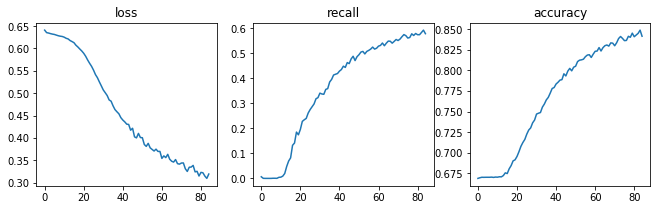

In [ ]:
plt.figure(figsize=(11,3))

# loss plot on the training set
plt.subplot(1,3,1)
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

# accuracy plot on the training set
plt.subplot(1,3,2)
plt.plot(history.epoch,history.history['recall_2'])
plt.title('recall');

# accuracy plot on the training set
plt.subplot(1,3,3)
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

In [ ]:
predictions = model2.predict(new_X_train)

y_pred = predictions > 0.5
[tn, fp, fn, tp] = confusion_matrix(new_y_train, y_pred).ravel()
print('on the training dataset :\n [[TN, FP]\n [ FN, TP]]\n  =  \n', np.array([[tn, fp],[ fn, tp]]))

print("accuracy:", (tn + tp)/(tn+fn+tp+fp))

on the training dataset :
 [[TN, FP]
 [ FN, TP]]
  =  
 [[7794   80]
 [1500 2375]]
accuracy: 0.8655204698272193


In [ ]:
predictions = model2.predict(X_test)

y_pred = predictions > 0.5
[tn, fp, fn, tp] = confusion_matrix(y_test, y_pred).ravel()
print('on the training dataset :\n [[TN, FP]\n [ FN, TP]]\n  =  \n', np.array([[tn, fp],[ fn, tp]]))

print("accuracy:", (tn + tp)/(tn+fn+tp+fp))

on the training dataset :
 [[TN, FP]
 [ FN, TP]]
  =  
 [[1402  574]
 [  19    5]]
accuracy: 0.7035


### Conclusion
The neural network doesn't work very well. Even on the training set, it doesn't have a better accuracy than 90%. I tried with a larger model (more layers with more neurons) but it didn't work neither.

I think maybe it could be interesting to study the correlation between y and the other attributes.

### Study of the correlation

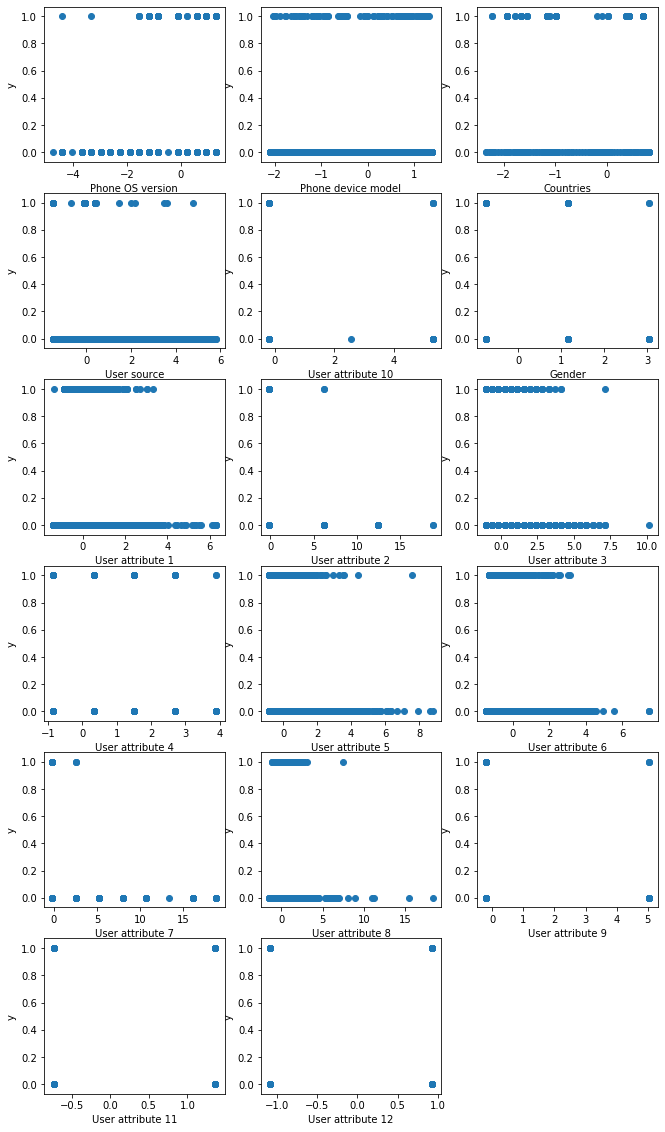

In [ ]:
plt.figure(figsize=(11,20))

# loss plot on the training set
plt.subplot(1,3,1)

for i in range(17):
    plt.subplot(6,3,i+1)
    plt.scatter(x_data[:,i], y_data)
    plt.xlabel(labels[i])
    plt.ylabel('y')

We can see that some attributes seem to be correlated with Y (for exemple 'User attribute 8', 'User attribute 5...) (its a good news because they have to be correlated if you want to predict Y)

However, I think the difficulty is that :

with some attributes, with some specific values, we can see that Y=0 has a better probability
but we cannot find some values of attributes where the probability of Y=1 has a better probability of Y=0.

## let's try an SVM

In [ ]:
from sklearn import svm

# I set class_weight to 'balanced' to precise to svm that the data are unbalanced.
clf = svm.SVC(class_weight='balanced', gamma='scale', tol = 0.0001, kernel = 'rbf')  
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)

In [ ]:
prediction3=clf.predict(X_test)

In [ ]:
# on the training dataset
prediction=clf.predict(X_train)
y_pred = prediction
[tn, fp, fn, tp] = confusion_matrix(y_train, y_pred).ravel()
print('on the training dataset :\n [[TN, FP]\n [ FN, TP]]\n  =  \n', np.array([[tn, fp],[ fn, tp]]))
print("accuracy:", (tn + tp)/(tn+fn+tp+fp))

on the training dataset :
 [[TN, FP]
 [ FN, TP]]
  =  
 [[6484 1390]
 [   7  118]]
accuracy: 0.8253531691461433


In [ ]:
# on the testing dataset
prediction=clf.predict(X_test)
y_pred = prediction
[tn, fp, fn, tp] = confusion_matrix(y_test, y_pred).ravel()
print('on the testing dataset :\n [[TN, FP]\n [ FN, TP]]\n  =  \n', np.array([[tn, fp],[ fn, tp]]))
print("accuracy:", (tn + tp)/(tn+fn+tp+fp))

on the testing dataset :
 [[TN, FP]
 [ FN, TP]]
  =  
 [[1573  403]
 [  17    7]]
accuracy: 0.79


I tried different possible kernel for the svm.  
Here are the results that I obtained:  

| kernel | acc(X_train) | acc(X_test) |
| --- | --- | --- |
| 'poly' | 0.796 | 0.7745 |
| 'sigmoid' | 0.5543 | 0.5785 |
| 'linear' | 0.6337 | 0.638 |
| 'rbf' | 0.8253 | 0.79 |

  
So, the best result here is with kernel = 'rbf'

# Conclusion

Personnaly, I am not satisfied of the differet models that I have.  
If we want a better accuracy, we can obtain 98%, but these models only predict y=0 so it is not interesting.  
  
We have obtained 2 other models, the first one with (it can change a little bit):  
* accuracy = 0.7505  
* tp = 4  
* tn = 1497  
* fp = 479  
* fn = 20  

the other model, by svm, we have obtained:
* accuracy = 0.79  
* tp = 7  
* tn = 1573  
* fp = 403  
* fn = 17  

If we considere that the most important is to detect the tp then it seems that our best model is from the SVM.
